# Notebook for all 2016 campaign data

## Import Data

In [3]:
import os
import pandas as pd
import numpy as np

DIR = os.getcwd()
print(DIR)

df = pd.read_csv(DIR + "/2015to2016contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.head()

/Users/lukedobrovic/Data/Spectator/personal-campaign-contributions


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,15,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225038,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595836,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
1,C00575795,HILLARY FOR AMERICA,2016,M10,201701099041150117,17A,C11241249,1137625,NaN,IND,...,F3P,4010920171359608009,t,NaN,2016,SA,NaN,4011120171366214585,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
2,C00465492,FRIENDS OF JOE SESTAK,2013,Q2,201507210200225036,11AI,NaN,1020266,NaN,IND,...,F3,1040720160018595573,t,NaN,2014,SA,NaN,1040720160018595829,http://docquery.fec.gov/cgi-bin/fecimg/?201507...,Contributions From Individuals/Persons Other T...
3,C00575795,HILLARY FOR AMERICA,2016,12G,201701099041274498,17A,C12244496,1137788,NaN,IND,...,F3P,4010920171359608011,t,NaN,2016,SA,NaN,4011120171366556953,http://docquery.fec.gov/cgi-bin/fecimg/?201701...,Contributions From Individuals/Persons Other T...
4,C00179408,MAINE DEMOCRATIC PARTY,2016,M9,201909059163143517,11AI,11AI-000039245,1350680,NaN,IND,...,F3X,4090520191672279180,t,NaN,2016,SA,NaN,4090620191672313017,http://docquery.fec.gov/cgi-bin/fecimg/?201909...,Contributions From Individuals/Persons Other T...


## Data Cleaning: Select desired columns, remove other "Columbia" institutions and remove negative values under contributions

In [4]:
# df.columns
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

In [5]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA", "SOUTHERN", "BRIRISH"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

df_selections = df_selections[df_selections["contribution_receipt_amount"] >= 0]  

In [6]:
df_selections["contributor_employer"].unique()

array(['COLUMBIA UNIVERSITY', 'TEACHERS COLLEGE, COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY COLLEGE OF PHYSICI',
       'TEACHERS COLLEGE COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY MEDICAL CENTER', 'COLUMBIA UNIVERSITY SIPA',
       "COLUMBIA UNIVERSITY WOMENSTRONG INT'L",
       "COLUMBIA UNIVERSITY WOMENSTRONG INT'L.",
       'COLUMBIA UNIVERSITY BUSINESS SCHOOL',
       'UNIVERSITY OF THE DISTRCT OF COLUMBIA',
       'COLUMBIA UNIVERSITY PRESS',
       'COLUMBIA UNIVERSITY TEACHERS COLLEGE', 'COLUMBIA UNIVERSITY-SSA',
       'COLUMBIA UNIVERSITY AND NEW YORK STATE',
       'HHMI & COLUMBIA UNIVERSITY', 'CIESIN COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY, NY NY',
       'AMERICAN ASSEMBLY, COLUMBIA UNIVERSITY', 'COLUMBIA  UNIVERSITY',
       'TEACHERS COLLEGE - COLUMBIA UNIVERSITY',
       'COLUMBIA UNIVERSITY IN NYC',
       'COLUMBIA UNIVERSITY MAILMAN SCHOOL OF',
       'COLUMBIA UNIVERSITY MSPH',
       'COLUMBIA UNIVERSITY WEATHERHEAD INSTIT',
       'UNIVERS

In [7]:
df_selections["committee_name"].unique()

array(['FRIENDS OF JOE SESTAK', 'HILLARY FOR AMERICA',
       'MAINE DEMOCRATIC PARTY', 'FRIENDS OF JOHN PLUMB', 'NORPAC',
       "DNC SERVICES CORP./DEM. NAT'L COMMITTEE",
       'COLLEEN DEACON FOR CONGRESS', 'DR. MATT HEINZ FOR ARIZONA',
       'FRIENDS OF CHERI BUSTOS',
       'LATINO LEADERS FOR EQUALITY GROWTH OPPORTUNITY PROGRESSIVE ACTION & CHANGE (LLEGO-PAC)',
       'KATIE MCGINTY FOR SENATE', 'ZEPHYR TEACHOUT FOR CONGRESS',
       'REPUBLICAN NATIONAL COMMITTEE', 'JILL STEIN FOR PRESIDENT',
       "EMILY'S LIST", 'ACTBLUE',
       'POLITICAL ACTION COMMITTEE OF THE AMERICAN ASSOCIATION OF ORTHOPAEDIC SURGEONS--PAC OF AAOS',
       'JULIA BROWNLEY FOR CONGRESS', 'KAINE FOR VIRGINIA',
       'DEMOCRATIC ACTION', "O'MALLEY FOR PRESIDENT", 'MAGGIE FOR NH',
       'CAROLINE FAYARD FOR US SENATE', 'DEBORAH ROSS FOR SENATE',
       'FRIENDS OF SCHUMER', 'MARCO RUBIO FOR SENATE 2016',
       'BENNET FOR COLORADO', 'TAMMY FOR ILLINOIS', 'DSCC',
       'KAMALA HARRIS FOR SENATE',
    

## Calculate total donations before and after three-weeks-out day

In [8]:
import datetime
three_weeks = datetime.datetime(2016, 10, 18)

df_before = df_selections[df_selections["contribution_receipt_date"] < three_weeks]

df_after = df_selections[df_selections["contribution_receipt_date"] >= three_weeks]

In [9]:
print("Total: ", df_selections["contribution_receipt_amount"].sum())
print("Before: ", df_before["contribution_receipt_amount"].sum())
print("After: ", df_after["contribution_receipt_amount"].sum())

Total:  2141021.61
Before:  1874716.8900000001
After:  266304.72


## Create dataframes with contributions to each campaign

In [10]:
df_HILLARY = df_selections[df_selections["committee_name"].str.contains("HILLARY FOR AMERICA")]

df_HILLARY.reset_index()

df_trump = df_selections[df_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]

df_trump.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation,contributor_first_name,contributor_middle_name,contributor_last_name
0,840,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-28,40.0,COLUMBIA UNIVERSITY,FINANCIAL ANALYST,BRUCE,NaN,MACDONALD
1,923,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-06-03,80.0,COLUMBIA UNIVERSITY,CHEMIST,MILAN,NaN,STOJANOVIC
2,924,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-17,250.0,COLUMBIA UNIVERSITY,PHYSICIAN,RAGY,NaN,GIRGIS
3,942,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-06,2.4,COLUMBIA UNIVERSITY,STUDENT,JAMES,NaN,MCCONNELL
4,977,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-11,28.0,COLUMBIA UNIVERSITY,PROFESSOR,JOSEPH,NaN,TERWILLIGER
5,7696,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-10-23,80.0,COLUMBIA UNIVERSITY,ASSOCIATE PROFESSOR,ANDREI,NaN,TKATCHENKO
6,9620,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-03-09,150.8,COLUMBIA UNIVERSITY,PROFESSOR,JOSEPH,NaN,TERWILLIGER
7,26478,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-08-06,2.4,COLUMBIA UNIVERSITY,STUDENT,HOUSTON,NaN,BROWN
8,27026,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-12-14,0.8,COLUMBIA UNIVERSITY,STUDENT,ELISEO,NaN,SANTOS
9,27027,"DONALD J. TRUMP FOR PRESIDENT, INC.",2016-12-08,0.8,COLUMBIA UNIVERSITY,CONSULTANT ARTS & CULTURE,ISKRITSA,NaN,OGNIANOVA


## CU Republicans preferred other candidates over Trump

In [14]:
df_kasich = df_selections[df_selections["committee_name"].str.contains("KASICH FOR AMERICA INC")]

df_cruz = df_selections[df_selections["committee_name"].str.contains("CRUZ FOR PRESIDENT")]

df_rubio = df_selections[df_selections["committee_name"].str.contains("MARCO RUBIO FOR PRESIDENT")]

df_jeb = df_selections[df_selections["committee_name"].str.contains("JEB 2016, INC.")]

df_christie = df_selections[df_selections["committee_name"].str.contains("CHRIS CHRISTIE FOR PRESIDENT INC")]

df_pataki = df_selections[df_selections["committee_name"].str.contains("PATAKI FOR PRESIDENT INC")]

df_RNC = df_selections[df_selections["committee_name"].str.contains("REPUBLICAN NATIONAL COMMITTEE")]

In [16]:
frames = [df_kasich, df_cruz, df_rubio, df_jeb, df_christie, df_pataki, df_trump]
df_repubs = pd.concat(frames)
df_repubs = df_repubs.groupby(["committee_name"]).sum()
df_repubs = df_repubs.sort_values(by="contribution_receipt_amount", ascending=False)
df_repubs

,contribution_receipt_amount
committee_name,
"JEB 2016, INC.",5900.0
MARCO RUBIO FOR PRESIDENT,4200.0
CHRIS CHRISTIE FOR PRESIDENT INC,2700.0
CRUZ FOR PRESIDENT,1000.0
KASICH FOR AMERICA INC,1000.0
"DONALD J. TRUMP FOR PRESIDENT, INC.",676.0
PATAKI FOR PRESIDENT INC,500.0


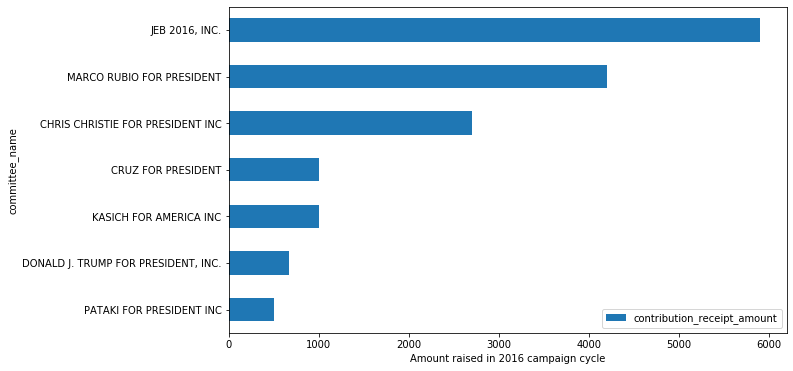

In [18]:
ax0 = df_repubs.plot(kind="barh",
                    figsize=(10,6))
ax0.set_xlabel("Amount raised in 2016 campaign cycle")
ax0.invert_yaxis()
plt = ax0
# plt.savefig("repubs.svg")

# plot = dtf.plot()
fig = ax0.get_figure()
# fig.savefig("repub.svg")

# Plots for donations per campaign and total donation $

In [26]:
print(df_trump.shape)
print(df_HILLARY.shape)

(12, 8)
(3288, 8)


In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pywaffle import Waffle 

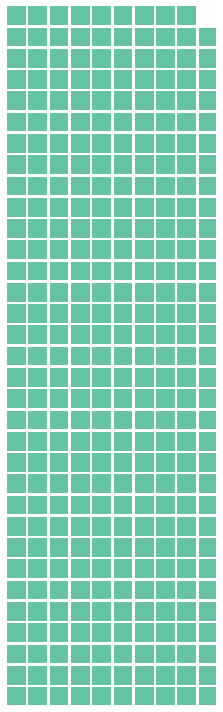

In [28]:
fig = plt.figure(FigureClass=Waffle,
                 columns=10,
                values=[328.8],
                figsize=(20,10),
                vertical=True,
                rounding_rule='floor')
#fig.savefig("hillary_donations.svg")
fig2 = plt.figure(FigureClass=Waffle, 
                 columns=100,
                 values=[1.2],
#                  figsize=(10,6),
                 vertical=True,
                 rounding_rule='floor')
# # fig2.savefig("trump_donations.svg")

## Group contributions by receipt date for each campaign and visualize!

In [29]:
df_HILLARY = df_HILLARY.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump = df_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

df_trump.head()

,contribution_receipt_date,contribution_receipt_amount
0,2016-03-09,150.8
1,2016-06-03,80.0
2,2016-06-28,40.0
3,2016-08-06,4.8
4,2016-08-11,28.0


In [30]:
df_max = df_trump.sort_values(by="contribution_receipt_amount", ascending=False)

df_max

,contribution_receipt_date,contribution_receipt_amount
5,2016-08-17,250.0
0,2016-03-09,150.8
1,2016-06-03,80.0
6,2016-10-23,80.0
8,2016-12-14,41.6
2,2016-06-28,40.0
4,2016-08-11,28.0
3,2016-08-06,4.8
7,2016-12-08,0.8


Text(0.5, 1.0, 'Contributions to Trump Campaign since Announcement of Clinton Candidacy (4/12/2015) even though nobody donated to Trump for forever')

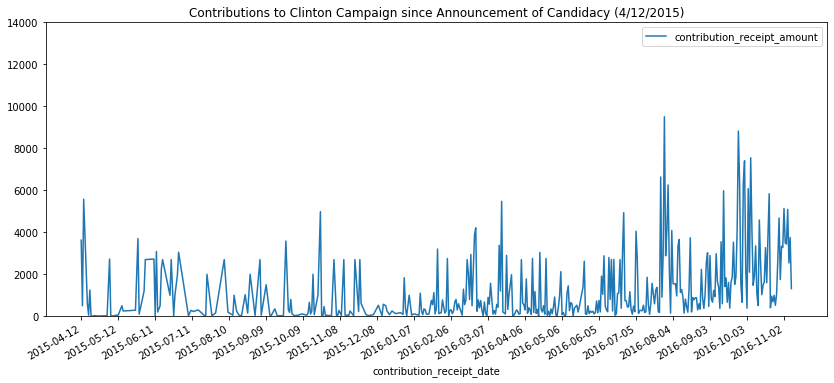

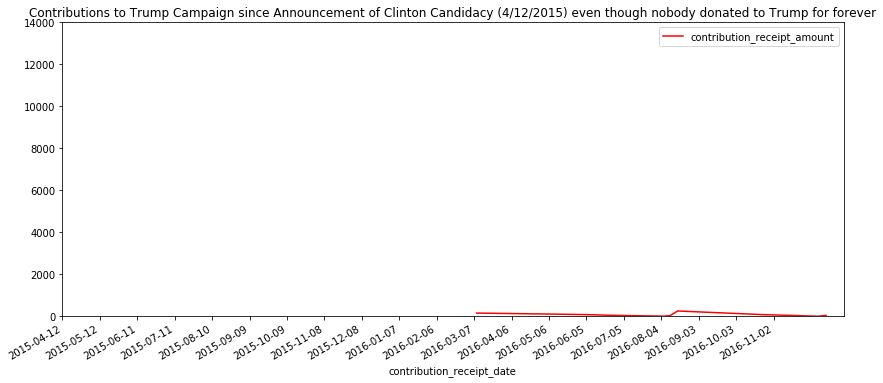

In [33]:
from datetime import datetime, timedelta
t = np.arange(datetime(2015,4,12), datetime(2016,11,10), timedelta(days=30)).astype(datetime)

ax1 = df_HILLARY.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 14000])
ax1.set_title("Contributions to Clinton Campaign since Announcement of Candidacy (4/12/2015)")


ax2 = df_trump.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 14000])
ax2.set_title("Contributions to Trump Campaign since Announcement of Clinton Candidacy (4/12/2015) even though nobody donated to Trump for forever")

## Collect and visualize top committes by funds raised over 2015-2016

In [34]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,115,HILLARY FOR AMERICA,501596.80
1,3,ACTBLUE,333992.25
2,116,HILLARY VICTORY FUND,254830.90
3,67,DNC SERVICES CORP./DEM. NAT'L COMMITTEE,238756.63
4,26,BERNIE 2016,69740.95


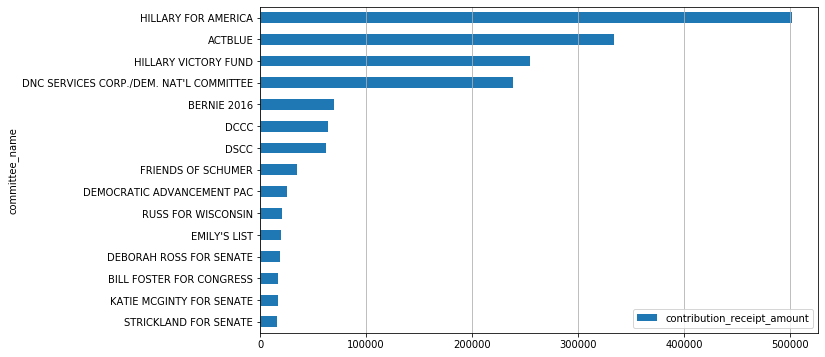

In [35]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.grid(axis='x')
ax3.invert_yaxis()
plt.savefig("hijessica.pdf")

## Collect and visualize occupation of individual Columbia donors 

In [37]:
df_occ = df_selections.drop_duplicates(subset=["contributor_last_name", "contributor_middle_name",
                                              "contributor_middle_name"])
occupations = df_occ["contributor_occupation"].value_counts()

occupations.head(15)

PROFESSOR                   331
STUDENT                     291
PHYSICIAN                   142
GRADUATE STUDENT             74
RESEARCHER                   45
SCIENTIST                    42
ADMINISTRATOR                32
TEACHER                      25
LIBRARIAN                    21
RESEARCH ASSISTANT           21
PHD STUDENT                  19
ADJUNCT PROFESSOR            18
RESEARCH SCIENTIST           16
EDUCATOR                     16
ADMINISTRATIVE ASSISTANT     14
Name: contributor_occupation, dtype: int64

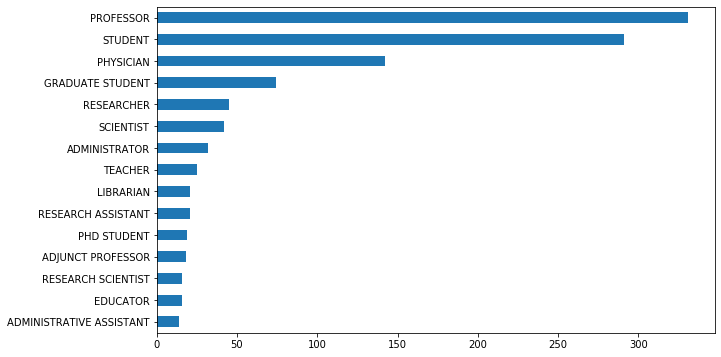

In [38]:
ax5 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax5.invert_yaxis()

## Bubble plot for individual Columbia donors

In [50]:
from pprint import pprint as pp
import circlify as circ

[Circle(x=-0.36796041841749116, y=0.8249867010395682, r=0.0966739644989054, level=1, ex={'datum': 14}),
 Circle(x=-0.6084101928594475, y=0.5801215325962874, r=0.10334881525030033, level=1, ex={'datum': 16}),
 Circle(x=-0.762668782140797, y=0.4067569590222166, r=0.10334881525030033, level=1, ex={'datum': 16}),
 Circle(x=-0.7440304212065247, y=0.19460733250453552, r=0.10961797213662455, level=1, ex={'datum': 18}),
 Circle(x=0.062296477506674094, y=0.7472803786903747, r=0.1126217604026786, level=1, ex={'datum': 19}),
 Circle(x=-0.17138818509961587, y=0.7377137236219682, r=0.11840094221712694, level=1, ex={'datum': 21}),
 Circle(x=-0.3766671396397842, y=0.5992945984305373, r=0.1291860190628754, level=1, ex={'datum': 25}),
 Circle(x=0.3017518222160936, y=0.6491593411039553, r=0.1461572961821661, level=1, ex={'datum': 32}),
 Circle(x=-0.5027487962805588, y=0.330793362743383, r=0.16744421828121409, level=1, ex={'datum': 42}),
 Circle(x=0.4527450572221688, y=0.3676143658467007, r=0.17332123222

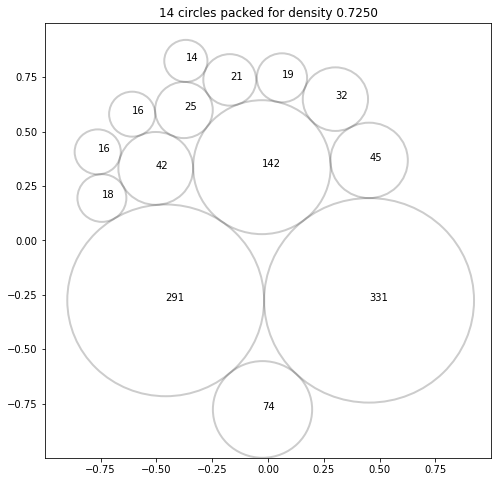

In [51]:
circles = circ.circlify([occupations[0], 
                          occupations[1], 
                          occupations[2],
                          occupations[3],
                          occupations[4],
                          occupations[5],
                          occupations[6],
                          occupations[7],
                          occupations[8],
                          occupations[10],
                          occupations[11],
                         occupations[12],
                         occupations[13],
                         occupations[14]],
                         show_enclosure=False)
pp(circles)
circ.bubbles(circles)